In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading Dataset
data=pd.read_csv("hour.csv",
           skipinitialspace=False)

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.shape

(17379, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### unique values & missing values

In [7]:
#Looking for unique values & missing values
data_missing = data.isnull().sum(axis = 0)
data_unique = data.nunique()
data1 = pd.concat([data_unique,data_missing], axis=1, sort=None)
data1.columns = ['data_unique', 'data_missing']
data1 

,data_unique,data_missing
instant,17379,0
dteday,731,0
season,4,0
yr,2,0
mnth,12,0
hr,24,0
holiday,2,0
weekday,7,0
workingday,2,0
weathersit,4,0


In [8]:
#Dropping most unique values containing column i.e. instant variable
data = data.drop(['instant'],axis=1)

In [9]:
data.describe(include = ['O'])

,dteday
count,17379
unique,731
top,2011-03-20
freq,24


In [10]:
#Converting 'dteday' variable to datetime data type
data['dteday'] = pd.to_datetime(data.dteday)

### Exploratory Data Analysis

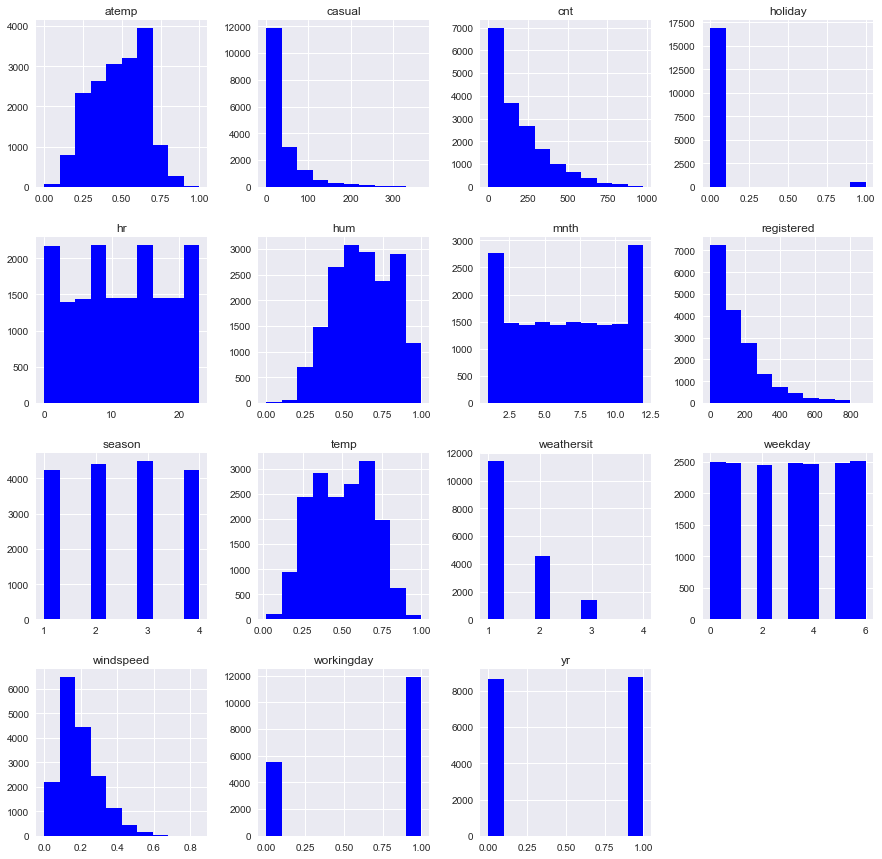

In [11]:
plt.style.use('seaborn')
data.hist(figsize=[15,15],color="blue")
plt.show()

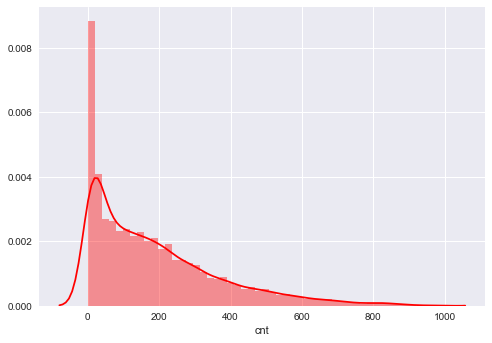

In [12]:
sns.distplot(data.cnt, color="r")

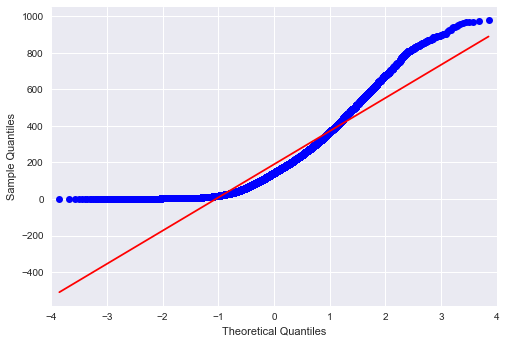

In [13]:
qqplot(data.cnt, line='s')
pyplot.show()

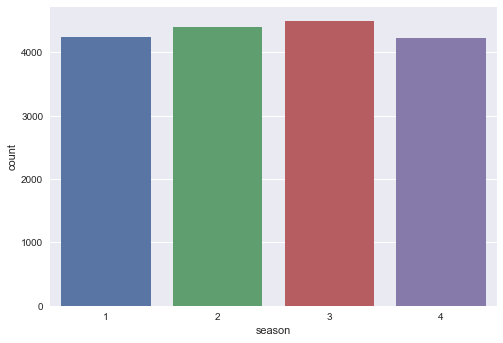

In [14]:
ax = sns.countplot(x="season", data=data)

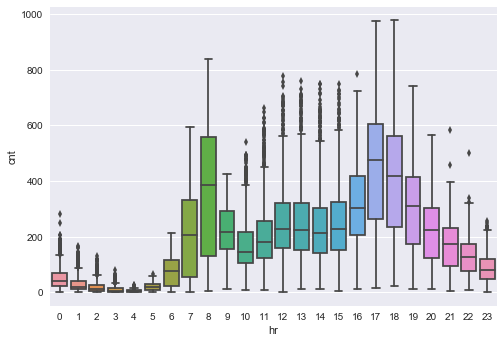

In [15]:
ax = sns.boxplot(x="hr", y="cnt", data=data)

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

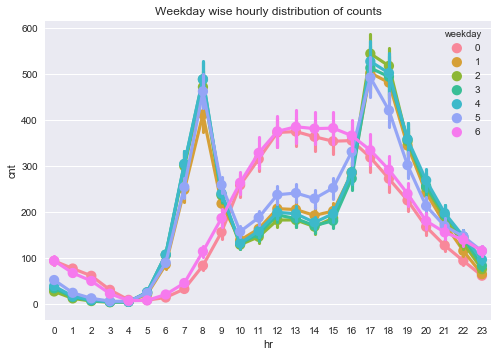

In [16]:
fig,ax = plt.subplots()
sns.pointplot(data=data[['hr',
                           'cnt',
                           'weekday']],
              x='hr',
              y='cnt',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

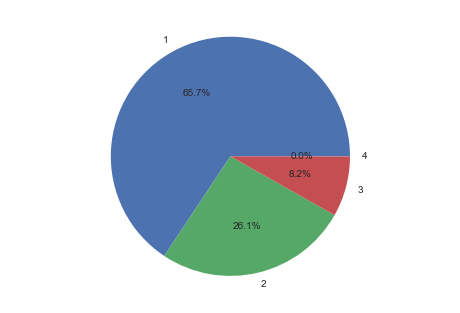

In [17]:
from matplotlib.pyplot import pie, axis, show
sums = data.cnt.groupby(data.weathersit).count()
axis('equal');
pie(sums, labels=sums.index, autopct='%1.1f%%');
show()

[Text(0.5, 1.0, 'Monthly distribution of counts')]

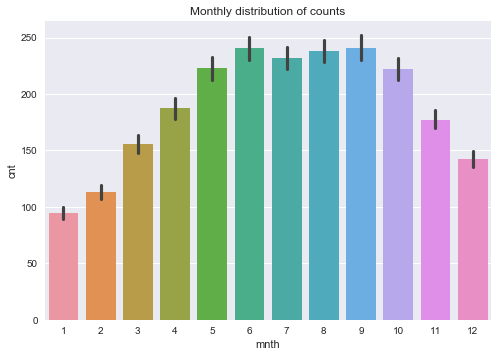

In [18]:
fig,ax = plt.subplots()
sns.barplot(data=data[['mnth',
                           'cnt']],
              x='mnth',
              y='cnt',
              ax=ax)
ax.set(title="Monthly distribution of counts")

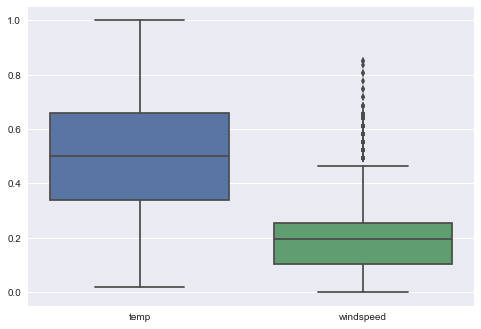

In [19]:
fig,ax = plt.subplots()
sns.boxplot(data=data[['temp',
                          'windspeed']],ax=ax)

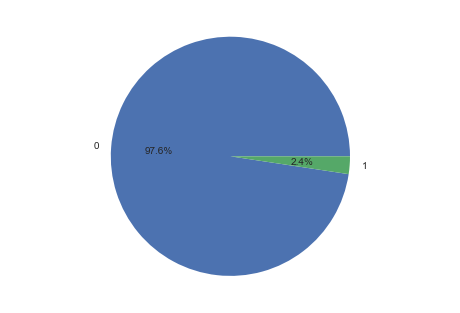

In [20]:
from matplotlib.pyplot import pie, axis, show
sums = data.cnt.groupby(data.holiday).sum()
axis('equal');
pie(sums, labels=sums.index, autopct='%1.1f%%');
show()

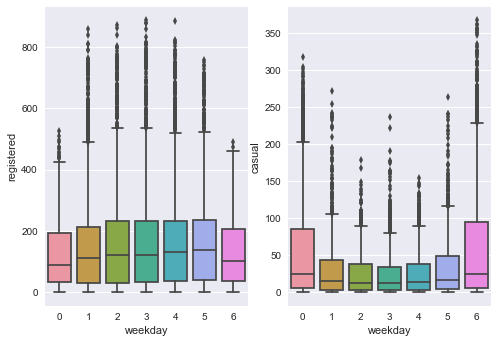

In [21]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(x="weekday", y="registered", data=data,ax=ax1)
sns.boxplot(x="weekday", y="casual", data=data,ax=ax2)

[Text(0.5, 1.0, 'Yearly distribution of counts')]

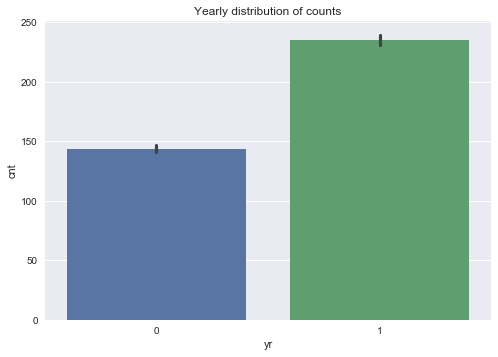

In [22]:
ax = sns.barplot(x="yr", y="cnt", data=data)
ax.set(title="Yearly distribution of counts")

### Feature Engineering

In [23]:
data.columns.tolist()

['dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [24]:
#Columns with integer values
names = []
for col in data:
    if data[col].dtype == 'int64':
        names = names + [col]
    
print(names)

['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'casual', 'registered', 'cnt']


In [25]:
#Columns with binary values
for col in data.columns:
    if (len(data[col].unique()) == 2):
        print(data[col].value_counts())
print()
data_binary = data[['yr','holiday','workingday']]

1    8734
0    8645
Name: yr, dtype: int64
0    16879
1      500
Name: holiday, dtype: int64
1    11865
0     5514
Name: workingday, dtype: int64



In [26]:
#Creating dummies for the variables which are categorical
X_old = data[['season','mnth', 'hr','weekday','weathersit']]
X = data[['season','hr','weekday','weathersit']]
for col in X:
    temp=pd.get_dummies(X[col],columns=col,prefix=col)
    data_binary = pd.concat([data_binary, temp], axis=1)
data_binary.head()

,yr,holiday,workingday,season_1,season_2,season_3,season_4,hr_0,hr_1,hr_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [27]:
#Columns with integer values
new = []
for col in data:
    if data[col].dtype == 'float64':
        new = new + [col]
    
print(new)

['temp', 'atemp', 'hum', 'windspeed']


In [28]:
data_numeric = data[['temp', 'atemp', 'hum', 'windspeed','casual','registered','cnt']]

In [29]:
data_numeric.columns.tolist()

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [30]:
data_numeric.shape

(17379, 7)

In [31]:
# Create correlation matrix for continuous variables
corr_matrix = data_numeric.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

cor=data_numeric.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm')

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1,0.987672,-0.0698814,-0.0231253,0.459616,0.335361,0.404772
atemp,0.987672,1,-0.0519177,-0.062336,0.45408,0.332559,0.400929
hum,-0.0698814,-0.0519177,1,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.0231253,-0.062336,-0.290105,1,0.0902868,0.0823208,0.0932338
casual,0.459616,0.45408,-0.347028,0.0902868,1,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.0823208,0.506618,1,0.972151
cnt,0.404772,0.400929,-0.322911,0.0932338,0.694564,0.972151,1


In [32]:
# Create correlation matrix for categorical variables
corr_matrix = X_old.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

cor=X_old.corr(method='spearman')
cor.style.background_gradient(cmap='coolwarm')

,season,mnth,hr,weekday,weathersit
season,1,0.830847,-0.00609189,-0.00231984,-0.0133353
mnth,0.830847,1,-0.00573663,0.0102929,0.00861408
hr,-0.00609189,-0.00573663,1,-0.00349691,-0.0303488
weekday,-0.00231984,0.0102929,-0.00349691,1,0.00327722
weathersit,-0.0133353,0.00861408,-0.0303488,0.00327722,1


In [33]:
data = pd.concat([data_numeric, data_binary], axis=1)
data = data.drop(['atemp','registered','casual'],axis=1)

In [34]:
data.head()

,temp,hum,windspeed,cnt,yr,holiday,workingday,season_1,season_2,season_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.81,0.0,16,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0.22,0.80,0.0,40,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0.22,0.80,0.0,32,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0.24,0.75,0.0,13,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0.24,0.75,0.0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


### Removing outliers 

Samples in train set with outliers: 17379
Samples in train set without outliers: 16874


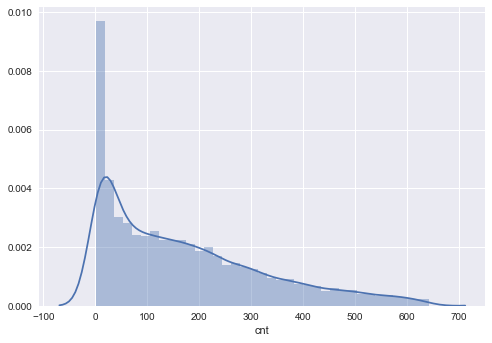

In [35]:
#Removing outliers 
print("Samples in train set with outliers: {}".format(len(data)))
q1 = data.cnt.quantile(0.25)
q3 = data.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
train_preprocessed = data.loc[(data.cnt >= lower_bound) & (data.cnt <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(train_preprocessed)))
sns.distplot(train_preprocessed.cnt);

### Splitting dataset

In [36]:
data = train_preprocessed

In [37]:
data.shape

(16874, 46)

In [38]:
y=data.cnt
X=data.drop(['cnt'],axis=1)

In [39]:
X.shape

(16874, 45)

In [40]:
y.shape

(16874,)

### Training the model

In [41]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [42]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

### Modelling

In [43]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

#Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()

#Ridge Regression
from  sklearn.linear_model import Ridge
ridge = Ridge()

#Linear SVR
from sklearn.svm import LinearSVR
svc_lin = LinearSVR()

#Kernel SVR
from sklearn.svm import SVR
svc_rbf = SVR(kernel = 'rbf')

#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=0)

models = [lreg, knn, lasso, ridge, svc_lin, svc_rbf, rf, gbrt]

### Building Data Model Pipeline

In [44]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
# Quickly trains modeling pipeline & evaluates on test data.
def quick_eval(pipeline, X_train, y_train, X_test, y_test, verbose=True):
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    train_score = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_score = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    if verbose:
        print(f"Regression algorithm: {pipeline.named_steps['regressor'].__class__.__name__}")
        print('Test R2: %.2f'% r2_score(y_test, y_test_pred))
        print('Test MSE: %.2f'% mean_squared_error(y_test, y_test_pred))
        print('Test RMSE: %.2f'% test_score, "\r\n")  
    
    return pipeline.named_steps['regressor'], train_score, test_score
    
regressors = [lreg, knn, lasso, ridge, svc_lin, svc_rbf, rf, gbrt]

for r in regressors:
    pipe = Pipeline(steps = [('regressor', r)])
    quick_eval(pipe, X_train, y_train, X_test, y_test)


Regression algorithm: LinearRegression
Test R2: 0.66
Test MSE: 8193.99
Test RMSE: 90.52 

Regression algorithm: KNeighborsRegressor
Test R2: 0.82
Test MSE: 4341.04
Test RMSE: 65.89 

Regression algorithm: Lasso
Test R2: 0.64
Test MSE: 8679.84
Test RMSE: 93.17 

Regression algorithm: Ridge
Test R2: 0.66
Test MSE: 8192.51
Test RMSE: 90.51 

Regression algorithm: LinearSVR
Test R2: 0.62
Test MSE: 9164.91
Test RMSE: 95.73 

Regression algorithm: SVR
Test R2: 0.19
Test MSE: 19499.17
Test RMSE: 139.64 

Regression algorithm: RandomForestRegressor
Test R2: 0.91
Test MSE: 2245.36
Test RMSE: 47.39 

Regression algorithm: GradientBoostingRegressor
Test R2: 0.37
Test MSE: 15352.88
Test RMSE: 123.91 



##### Random Forest Regressor is found to be the best model with highest R2 value of 91% and lowest Mean squared error of 2245

### Feature Importance

<IPython.core.display.Javascript object>


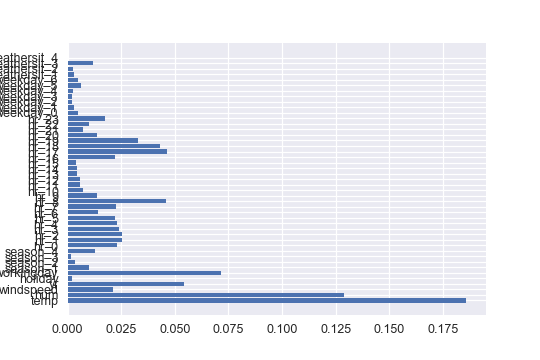

([<matplotlib.axis.YTick at 0x231786dff28>,
 <a list of 45 Text yticklabel objects>)

In [46]:
%matplotlib notebook

y_list = rf.feature_importances_
y_pos = np.arange(len(y_list))
features = X.columns
plt.barh(y_pos, y_list,  height=0.8, align='center', alpha=1)
plt.yticks(y_pos, features)

##### Temperature, humidity, working day & hour variables have high feature importance